In [ ]:
# Imports + settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

pd.set_option('display.max_columns', None)


In [ ]:
df_survey = pd.read_csv('/content/ALPR General Survey Results v2.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/ALPR General Survey Results v2.csv'

In [ ]:
df_survey

,Run,Program Version,User,Time Started (UTC),Time Finished (UTC),Minutes Spent,Position,Points,testing question? (8vufenf),"Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)",What is your ZIP code? (7bepp7b),participantID,assignmentID,projectID,startedAt,computerCountry,computerID,device,Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt),"How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)",How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu),How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n),"After being approved by local governments, private companies like Flock Safety install Automatic License Plate Reader (ALPR) cameras in neighborhoods and share data with police. Before today, how aware were you of that fact? (50mnfkf)","In some Bay Area cities, Automatic License Plate Reader (ALPR) cameras store an image of your license plate, vehicle make and model, and location in a searchable database for up to 12 months every time you drive past one. Before today, how aware were you of that fact? (6s6r3ex)","Police can search the Automatic License Plate Reader (ALPR) database for your data without a warrant or approval from any other organization. Before today, how aware were you of that fact? (zke2ete)","Police can legally share your license plate Automatic License Plate Reader (ALPR) data with other local governments/police departments within California at any time without a warrant. Before today, how aware were you of that fact? (skzr4a8)","The image above shows locations and number of Automatic License Plate Reader (ALPR) cameras in the Bay Area reported by residents. Actual locations and counts may vary, but there is likely to be more installed than shown in the image. Before today, how aware were you of the number of ALPR cameras in the Bay Area? (3eg0nl6)",How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc),How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu),Have you ever felt uncomfortable or treated unfairly due to surveillance technology? (5bdjc2c),"How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)",Do you believe surveillance is being used more for public safety or social control? (cfu4j56),Which of the following groups should have access to surveillance data? (Select all that apply) (bgnrn84),Who do you trust to make decisions about how surveillance is used in your city? (Select all that apply) (w02ux9i),How important is it to you that the public has input or oversight before new surveillance technologies are adopted? (ttzmqna),"How likely do you think it is that police would share Automatic License Plate Reader (ALPR) data with federal agencies, even if not legally allowed? (gnnu4ft)",It’s okay for police to track and store the location data of people who haven’t done anything wrong. (nd9oynf),"Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)",Surveillance technologies such as ALPRs increase public safety. (u84m4pd),What should be done about ALPRs in your city? Select all that apply (vwzlz5r),What is your race or ethnicity? (Select all that apply) (d8morv7),How did you find this survey? (yyxwhnl),age,gender,education,yearOfBirth,educationScore,politicalViews,householdIncome,femaleAs1MaleAs0,politicalLiberalness,householdI

In [ ]:
df_survey['What is your ZIP code? (7bepp7b)'].unique()

NameError: name 'df_survey' is not defined

In [ ]:
df_zipmap = pd.read_csv('/content/zip_code_database.csv')

In [ ]:
df_survey["zip_clean"] = (
    df_survey["What is your ZIP code? (7bepp7b)"]
    .astype(str)
    .str.extract(r"(\d{5})")[0]   # keep only 5-digit numbers
)

In [ ]:
df_survey["zip_clean"] = df_survey["zip_clean"].str.zfill(5)
df_zipmap["zip"] = df_zipmap["zip"].astype(str).str.zfill(5)

In [ ]:
df_survey = df_survey.merge(
    df_zipmap[["zip", "primary_city"]],
    left_on="zip_clean",
    right_on="zip",
    how="left"
)

In [ ]:
unmapped = df_survey[df_survey["primary_city"].isna()]["zip_clean"].unique()
print("Unmapped ZIP codes:", unmapped)

Unmapped ZIP codes: [nan '40186']


In [ ]:
df_survey

,Run,Program Version,User,Time Started (UTC),Time Finished (UTC),Minutes Spent,Position,Points,testing question? (8vufenf),"Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)",What is your ZIP code? (7bepp7b),participantID,assignmentID,projectID,startedAt,computerCountry,computerID,device,Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt),"How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)",How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu),How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n),"After being approved by local governments, private companies like Flock Safety install Automatic License Plate Reader (ALPR) cameras in neighborhoods and share data with police. Before today, how aware were you of that fact? (50mnfkf)","In some Bay Area cities, Automatic License Plate Reader (ALPR) cameras store an image of your license plate, vehicle make and model, and location in a searchable database for up to 12 months every time you drive past one. Before today, how aware were you of that fact? (6s6r3ex)","Police can search the Automatic License Plate Reader (ALPR) database for your data without a warrant or approval from any other organization. Before today, how aware were you of that fact? (zke2ete)","Police can legally share your license plate Automatic License Plate Reader (ALPR) data with other local governments/police departments within California at any time without a warrant. Before today, how aware were you of that fact? (skzr4a8)","The image above shows locations and number of Automatic License Plate Reader (ALPR) cameras in the Bay Area reported by residents. Actual locations and counts may vary, but there is likely to be more installed than shown in the image. Before today, how aware were you of the number of ALPR cameras in the Bay Area? (3eg0nl6)",How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc),How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu),Have you ever felt uncomfortable or treated unfairly due to surveillance technology? (5bdjc2c),"How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)",Do you believe surveillance is being used more for public safety or social control? (cfu4j56),Which of the following groups should have access to surveillance data? (Select all that apply) (bgnrn84),Who do you trust to make decisions about how surveillance is used in your city? (Select all that apply) (w02ux9i),How important is it to you that the public has input or oversight before new surveillance technologies are adopted? (ttzmqna),"How likely do you think it is that police would share Automatic License Plate Reader (ALPR) data with federal agencies, even if not legally allowed? (gnnu4ft)",It’s okay for police to track and store the location data of people who haven’t done anything wrong. (nd9oynf),"Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)",Surveillance technologies such as ALPRs increase public safety. (u84m4pd),What should be done about ALPRs in your city? Select all that apply (vwzlz5r),What is your race or ethnicity? (Select all that apply) (d8morv7),How did you find this survey? (yyxwhnl),age,gender,education,yearOfBirth,educationScore,politicalViews,householdIncome,femaleAs1MaleAs0,politicalLiberalness,householdI

In [ ]:
df_survey = df_survey[df_survey["zip_clean"].str.startswith("9", na=False)].copy()

print("Number of CA respondents:", len(df_survey))
print("Unique CA ZIP codes:", df_survey["zip_clean"].nunique())

Number of CA respondents: 449
Unique CA ZIP codes: 187


In [ ]:
# Count how many respondents spent less than 1 minute
less_than_1 = (df_survey['Minutes Spent'] < 1).sum()
print("Number of respondents who spent <1 minute:", less_than_1)


Number of respondents who spent <1 minute: 6


In [ ]:
bay_area_cities = [
    # San Francisco County
    "San Francisco",

    # Alameda County
    "Alameda","Albany","Berkeley","Dublin","Emeryville","Fremont","Hayward",
    "Livermore","Newark","Oakland","Piedmont","Pleasanton","San Leandro",
    "Union City", "Castro Valley", "San Lorenzo"

    # Contra Costa County
    "Antioch","Brentwood","Clayton","Concord","Danville","El Cerrito","Hercules",
    "Lafayette","Martinez","Moraga","Oakley","Orinda","Pinole","Pittsburg",
    "Pleasant Hill","Richmond","San Pablo","San Ramon","Walnut Creek",

    # Marin County
    "Belvedere","Corte Madera","Fairfax","Larkspur","Mill Valley","Novato",
    "Ross","San Anselmo","San Rafael","Sausalito","Tiburon",

    # Napa County
    "American Canyon","Calistoga","Napa","St. Helena","Yountville",

    # San Mateo County
    "Atherton","Belmont","Brisbane","Burlingame","Colma","Daly City",
    "East Palo Alto","Foster City","Half Moon Bay","Hillsborough","Menlo Park",
    "Millbrae","Pacifica","Portola Valley","Redwood City","San Bruno",
    "San Carlos","San Mateo","South San Francisco","Woodside",

    # Santa Clara County
    "Campbell","Cupertino","Gilroy","Los Altos","Los Altos Hills","Los Gatos",
    "Milpitas","Monte Sereno","Morgan Hill","Mountain View","Palo Alto",
    "San Jose","Santa Clara","Saratoga","Sunnyvale",

    # Solano County
    "Benicia","Dixon","Fairfield","Rio Vista","Suisun City","Vacaville","Vallejo",

    # Sonoma County
    "Cloverdale","Cotati","Healdsburg","Petaluma","Rohnert Park","Santa Rosa",
    "Sebastopol","Sonoma","Windsor, Forrestville",

    "Castro Valley",   # Alameda
    "San Lorenzo",     # Alameda
    "El Sobrante",     # Contra Costa
    "Discovery Bay",   # Contra Costa (CDP)  <-- note: this IS Bay Area
    "Knightsen",       # Contra Costa
    "Woodacre",        # Marin
    "Pope Valley",     # Napa
    "Guerneville",     # Sonoma
    "Forestville",     # Sonoma
    "Kenwood"
]

df_bay = df_survey[df_survey['primary_city'].isin(bay_area_cities)].copy()
df_nonbay = df_survey[~df_survey['primary_city'].isin(bay_area_cities)].copy()

print("Bay Area respondents:", len(df_bay))
print("Non-Bay Area respondents:", len(df_nonbay))


Bay Area respondents: 400
Non-Bay Area respondents: 49


In [ ]:
df_survey = df_bay.copy()


In [ ]:
df_survey

,Run,Program Version,User,Time Started (UTC),Time Finished (UTC),Minutes Spent,Position,Points,testing question? (8vufenf),"Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)",What is your ZIP code? (7bepp7b),participantID,assignmentID,projectID,startedAt,computerCountry,computerID,device,Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt),"How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)",How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu),How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n),"After being approved by local governments, private companies like Flock Safety install Automatic License Plate Reader (ALPR) cameras in neighborhoods and share data with police. Before today, how aware were you of that fact? (50mnfkf)","In some Bay Area cities, Automatic License Plate Reader (ALPR) cameras store an image of your license plate, vehicle make and model, and location in a searchable database for up to 12 months every time you drive past one. Before today, how aware were you of that fact? (6s6r3ex)","Police can search the Automatic License Plate Reader (ALPR) database for your data without a warrant or approval from any other organization. Before today, how aware were you of that fact? (zke2ete)","Police can legally share your license plate Automatic License Plate Reader (ALPR) data with other local governments/police departments within California at any time without a warrant. Before today, how aware were you of that fact? (skzr4a8)","The image above shows locations and number of Automatic License Plate Reader (ALPR) cameras in the Bay Area reported by residents. Actual locations and counts may vary, but there is likely to be more installed than shown in the image. Before today, how aware were you of the number of ALPR cameras in the Bay Area? (3eg0nl6)",How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc),How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu),Have you ever felt uncomfortable or treated unfairly due to surveillance technology? (5bdjc2c),"How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)",Do you believe surveillance is being used more for public safety or social control? (cfu4j56),Which of the following groups should have access to surveillance data? (Select all that apply) (bgnrn84),Who do you trust to make decisions about how surveillance is used in your city? (Select all that apply) (w02ux9i),How important is it to you that the public has input or oversight before new surveillance technologies are adopted? (ttzmqna),"How likely do you think it is that police would share Automatic License Plate Reader (ALPR) data with federal agencies, even if not legally allowed? (gnnu4ft)",It’s okay for police to track and store the location data of people who haven’t done anything wrong. (nd9oynf),"Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)",Surveillance technologies such as ALPRs increase public safety. (u84m4pd),What should be done about ALPRs in your city? Select all that apply (vwzlz5r),What is your race or ethnicity? (Select all that apply) (d8morv7),How did you find this survey? (yyxwhnl),age,gender,education,yearOfBirth,educationScore,politicalViews,householdIncome,femaleAs1MaleAs0,politicalLiberalness,householdI

In [ ]:
df_nonbay['primary_city'].unique()

array(['Alhambra', 'Bakersfield', 'Sacramento', 'Los Angeles',
       'Brookings', 'Watsonville', 'Davis', 'Lodi', 'Stockton', 'Tracy',
       'Los Banos', 'Newman', 'Portland', 'Hollister', 'Antioch',
       'Rancho Cordova', 'Tustin', 'Windsor', 'Boulder Creek', 'Castaic',
       'Lower Lake', 'Santa Cruz', 'Honolulu', 'Inglewood'], dtype=object)

In [ ]:
# count of which rows are not nans
not_nan_count = df_survey['How did surveillance make you feel or impact you? (urjiu1g)'].notna().sum()
print(not_nan_count)

88


In [ ]:
df_survey.columns

Index(['Run', 'Program Version', 'User', 'Time Started (UTC)',
       'Time Finished (UTC)', 'Minutes Spent', 'Position', 'Points',
       'testing question? (8vufenf)',
       'Have you noticed surveillance technologies in your neighborhood that were installed by the government, police, or private businesses (not personal home cameras like Ring or Nest)? (lw3083d)',
       'What is your ZIP code? (7bepp7b)', 'participantID', 'assignmentID',
       'projectID', 'startedAt', 'computerCountry', 'computerID', 'device',
       'Which of the following surveillance tools have you heard of or seen in your city? (Select all that apply) (8dl9hmt)',
       'How concerned are you about surveillance technology in public spaces like streets, sidewalks, or public transit? (n15scu9)',
       'How often do you notice surveillance cameras or sensors in your neighborhood or daily routine? (6itkmu)',
       'How familiar are you with how automatic license plate reader (ALPR) cameras work? (724al0n)',
   

In [ ]:
# Do people who support ALPRs believe they can harm certain marginalized groups?

# Fix long title lol
df = df_survey.rename(columns={
    'How supportive are you of Automatic License Plate Reader (ALPR) cameras installed by local governments and used by law enforcement? (y7ka0mc)': 'support_gov',
    'How supportive are you of private individuals or businesses installing Automatic License Plate Reader (ALPR) cameras and sharing the data voluntarily with police? (uktyzgu)': 'support_private',
    'Surveillance technologies such as ALPRs disproportionately impact marginalized communities (e.g., by race, income, housing status, or immigration status)? (f1j1olu)': 'harm_belief',
    'How concerned are you that surveillance technologies may harm others (e.g., unhoused people, immigrants, protesters), even if they don’t affect you personally? (gvrrsub)': 'concern_others'
})

# List of columns
cols = ['support_gov', 'support_private', 'harm_belief', 'concern_others']

# Unique vals
for col in cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in support_gov:
['3 = Neutral / Not sure' '2 = Somewhat oppose' '5 = Strongly support'
 '4 = Somewhat support' '1 = Strongly oppose']

Unique values in support_private:
['2 = Somewhat oppose' '1 = Strongly oppose' '3 = Neutral / Not sure'
 '5 = Strongly support' '4 = Somewhat support']

Unique values in harm_belief:
['2 = Somewhat disagree' '3 = Neutral' '1 = Strongly disagree'
 '5 = Strongly agree' '4 = Somewhat agree']

Unique values in concern_others:
['2 = Slightly concerned' '3 = Moderately concerned' '4 = Very concerned'
 '1 = Not concerned at all' '5 = Extremely concerned']


In [ ]:
# NAN count
nan_counts = df[cols].isna().sum()
non_nan_counts = df[cols].notna().sum()

# View
summary = pd.DataFrame({
    'Non-NaN Count': non_nan_counts,
    'NaN Count': nan_counts
})

print(summary)

                 Non-NaN Count  NaN Count
support_gov                400          0
support_private            400          0
harm_belief                400          0
concern_others             400          0


In [ ]:
# Remove NaNs
df = df.dropna(subset=cols)

In [ ]:
def extract_numeric(val):
    if pd.isna(val):
        return None
    return int(str(val).split('=')[0].strip())

for col in ['support_gov', 'support_private', 'harm_belief', 'concern_others']:
    df[col + '_num'] = df[col].apply(extract_numeric)


In [ ]:
df = df[
    df['support_gov_num'].between(1, 5) &
    df['harm_belief_num'].between(1, 5)
]

In [ ]:
plt.rcParams['axes.grid'] = False
plt.rcParams['patch.edgecolor'] = 'none'

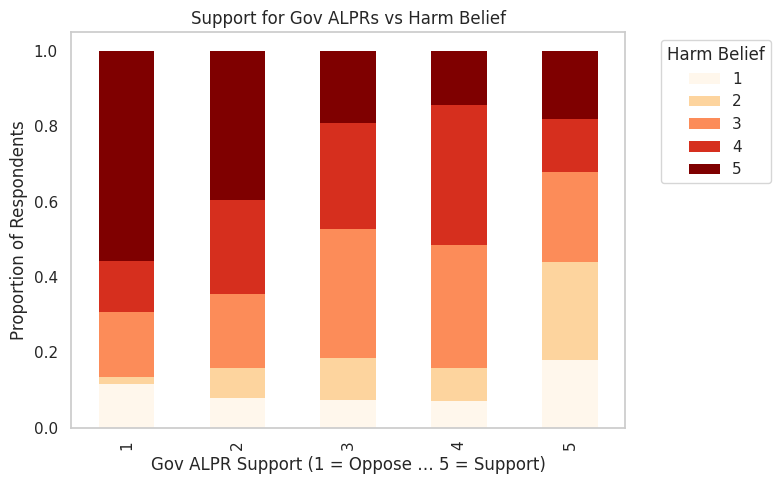

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['harm_belief_num'], normalize='index')

# Plot
ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Harm Belief")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

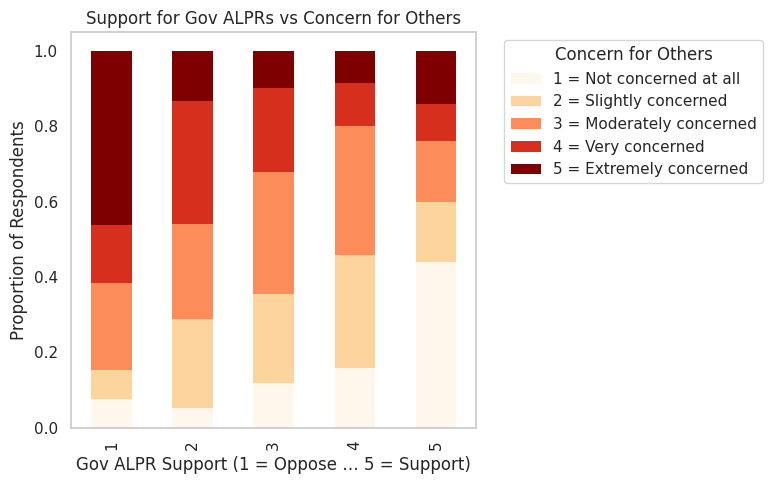

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['concern_others'], normalize='index')

# Plot
ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Concern for Others")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

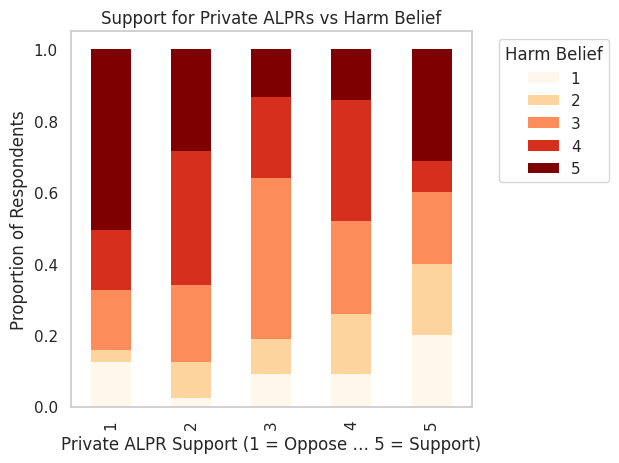

In [ ]:
# Crosstab and plot for private ALPRs vs harm_belief
ct = pd.crosstab(df['support_private_num'], df['harm_belief_num'], normalize='index')
ct.plot(kind='bar', stacked=True, cmap='OrRd')
plt.title("Support for Private ALPRs vs Harm Belief")
plt.xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
plt.ylabel("Proportion of Respondents")
plt.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


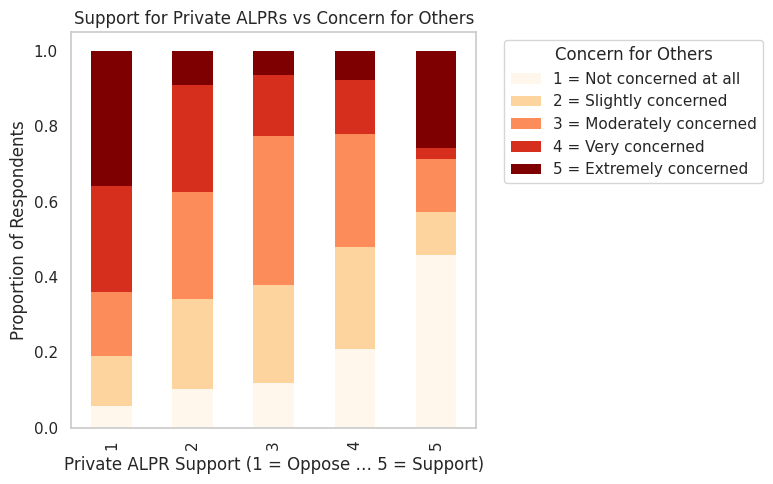

In [ ]:
ct = pd.crosstab(df['support_private_num'], df['concern_others'], normalize='index')

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Private ALPRs vs Concern for Others")
ax.set_xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

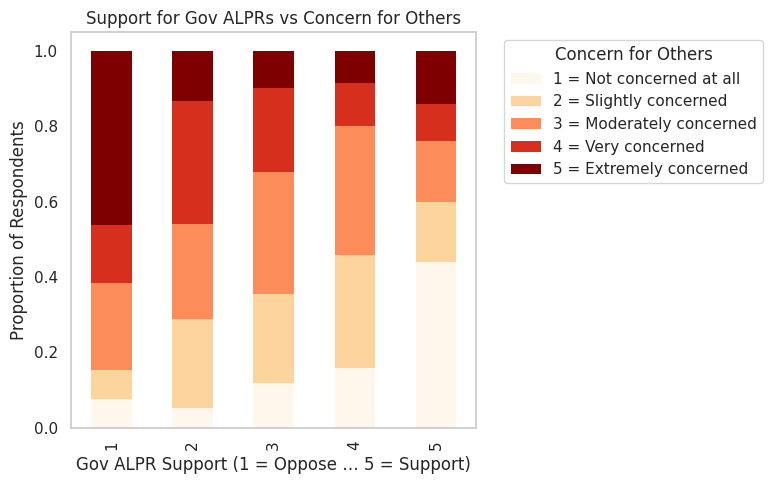

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['concern_others'], normalize='index')

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Concern for Others")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Concern for Others", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

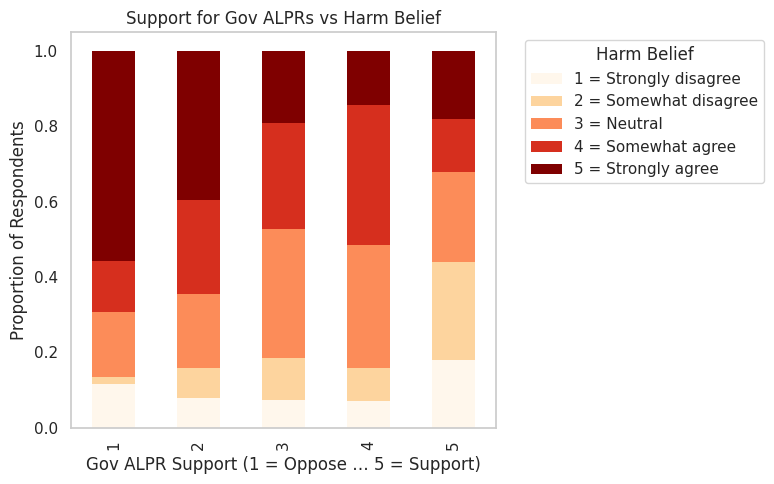

In [ ]:
ct = pd.crosstab(df['support_gov_num'], df['harm_belief_num'], normalize='index')

harm_belief_labels = {
    1: '1 = Strongly disagree',
    2: '2 = Somewhat disagree',
    3: '3 = Neutral',
    4: '4 = Somewhat agree',
    5: '5 = Strongly agree'
}

ct.columns = [harm_belief_labels.get(col, str(col)) for col in ct.columns]

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Gov ALPRs vs Harm Belief")
ax.set_xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


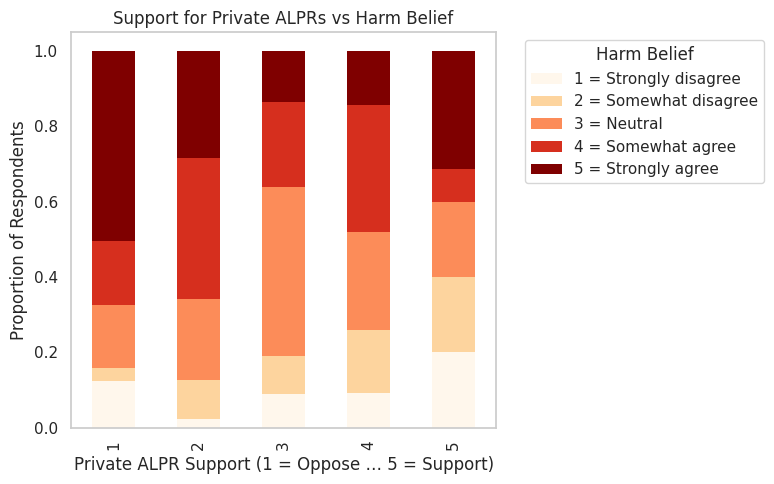

In [ ]:
ct = pd.crosstab(df['support_private_num'], df['harm_belief_num'], normalize='index')

harm_belief_labels = {
    1: '1 = Strongly disagree',
    2: '2 = Somewhat disagree',
    3: '3 = Neutral',
    4: '4 = Somewhat agree',
    5: '5 = Strongly agree'
}

ct.columns = [harm_belief_labels.get(col, str(col)) for col in ct.columns]

ax = ct.plot(kind='bar', stacked=True, cmap='OrRd', figsize=(8, 5))
ax.set_title("Support for Private ALPRs vs Harm Belief")
ax.set_xlabel("Private ALPR Support (1 = Oppose … 5 = Support)")
ax.set_ylabel("Proportion of Respondents")
ax.legend(title="Harm Belief", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


/tmp/ipython-input-4227996433.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


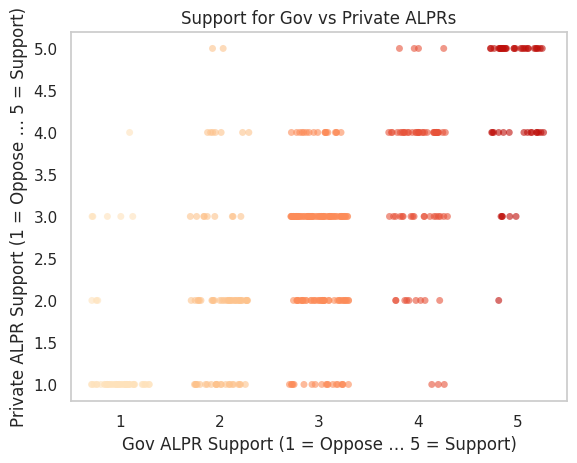

In [ ]:
sns.stripplot(
    x='support_gov_num',
    y='support_private_num',
    data=df,
    jitter=0.3,
    alpha=0.6,
    palette='OrRd'
)
plt.xlabel("Gov ALPR Support (1 = Oppose … 5 = Support)")
plt.ylabel("Private ALPR Support (1 = Oppose … 5 = Support)")
plt.title("Support for Gov vs Private ALPRs")
plt.show()


In [ ]:
df['support_diff'] = df['support_gov_num'] - df['support_private_num']

print(df['support_diff'].value_counts().sort_index())


support_diff
-3      3
-2     12
-1     34
 0    216
 1     98
 2     33
 3      4
Name: count, dtype: int64


In [ ]:
# Create binary columns for race/ethnicity
race_dummies = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].str.get_dummies(sep=', ')
race_dummies.columns = ['race_' + col.strip().replace(" ", "_").replace("/", "_") for col in race_dummies.columns]
df = pd.concat([df, race_dummies], axis=1)


In [ ]:
df.groupby('gender')[['support_gov_num', 'support_private_num', 'harm_belief_num', 'concern_others_num']].mean()


,support_gov_num,support_private_num,harm_belief_num,concern_others_num
gender,,,,
female,2.889952,2.62201,3.583732,3.076555
male,3.068421,2.80000,3.400000,2.905263
other,3.000000,1.00000,4.000000,4.000000


In [ ]:
df.groupby('race_White')[['support_gov_num', 'harm_belief_num']].mean()


,support_gov_num,harm_belief_num
race_White,,
0,2.912052,3.524430
1,3.182796,3.408602


In [ ]:
# Demographic columns
cat_cols = [
    'gender',
    'education',
    'politicalViews',
    'What is your race or ethnicity? (Select all that apply) (d8morv7)',
]

# Unique vals
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].dropna().unique())



Unique values in 'gender':
['female' 'male' 'other']

Unique values in 'education':
['completedOnlyHighSchoolOrTheEquivalent' 'completedBachelorsDegree'
 'completedMastersDegree' 'completedTradeTechicalVocationalTraing'
 'completedProfessionalDegree' 'completedAssociateDegreeOnly'
 'completedDoctorateDegree' 'nurseryTo8thGrade'
 'noSchoolingAtAllCompleted']

Unique values in 'politicalViews':
['Moderate' 'Liberal' 'Very conservative' 'Conservative' 'Very liberal']

Unique values in 'What is your race or ethnicity? (Select all that apply) (d8morv7)':
['Hispanic or Latino' 'Black or African American' 'White'
 'Black or African American,Native American or Indigenous,White'
 'Asian or Pacific Islander'
 'Hispanic or Latino,White,Middle Eastern or North African'
 'Native American or Indigenous' 'Prefer not to say'
 'Hispanic or Latino,Asian or Pacific Islander' 'Hispanic or Latino,White'
 'Another race or ethnicity' 'Asian or Pacific Islander,White'
 'Black or African American,Asian or Pac

In [ ]:
df['gender_female'] = (df['gender'] == 'female').astype(int)
df['gender_other'] = (df['gender'] == 'other').astype(int)

In [ ]:
edu_map = {
    'noSchoolingAtAllCompleted': 0,
    'nurseryTo8thGrade': 1,
    'completedOnlyHighSchoolOrTheEquivalent': 2,
    'completedTradeTechicalVocationalTraing': 3,
    'completedAssociateDegreeOnly': 4,
    'completedBachelorsDegree': 5,
    'completedMastersDegree': 6,
    'completedProfessionalDegree': 7,
    'completedDoctorateDegree': 8
}
df['education_ord'] = df['education'].map(edu_map)


In [ ]:
pol_map = {
    'Very conservative': 1,
    'Conservative': 2,
    'Moderate': 3,
    'Liberal': 4,
    'Very liberal': 5
}
df['political_ord'] = df['politicalViews'].map(pol_map)


In [ ]:
race_dummies = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].str.get_dummies(sep=', ')
race_dummies.columns = ['race_' + col.strip().replace(" ", "_").replace("/", "_") for col in race_dummies.columns]
df = pd.concat([df, race_dummies], axis=1)


In [ ]:
# Too many mixed races... simplify?

def collapse_primary_race(val):
    if pd.isna(val): return 'Unknown'
    if 'Black or African American' in val: return 'Black'
    elif 'Hispanic or Latino' in val: return 'Latinx'
    elif 'Asian or Pacific Islander' in val: return 'Asian'
    elif 'White' in val: return 'White'
    elif 'Native American or Indigenous' in val: return 'Indigenous'
    elif 'Middle Eastern or North African' in val: return 'MENA'
    elif 'Another race or ethnicity' in val: return 'Other'
    elif 'Prefer not to say' in val: return 'Prefer not to say'
    else: return 'Multiracial'

df['race_collapsed'] = df['What is your race or ethnicity? (Select all that apply) (d8morv7)'].apply(collapse_primary_race)


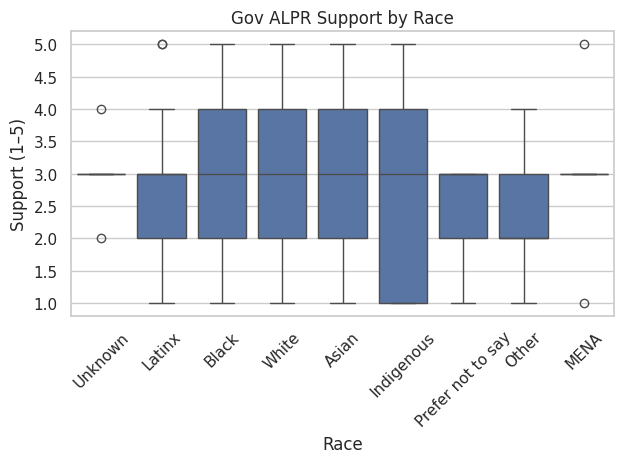

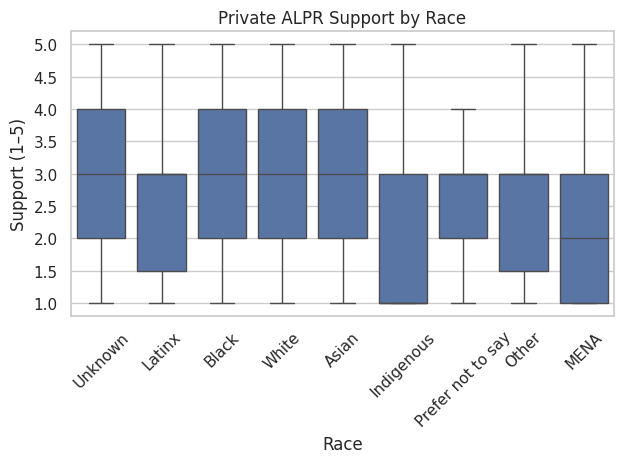

In [ ]:
# Set common styling
sns.set(style="whitegrid")

sns.boxplot(x='race_collapsed', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Race")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.boxplot(x='race_collapsed', y='support_private_num', data=df)
plt.title("Private ALPR Support by Race")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


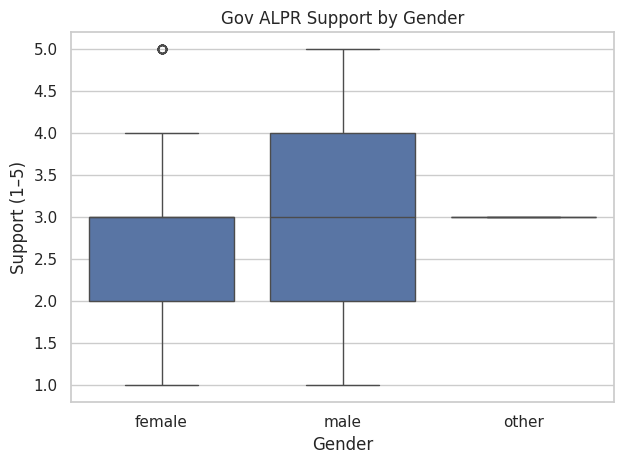

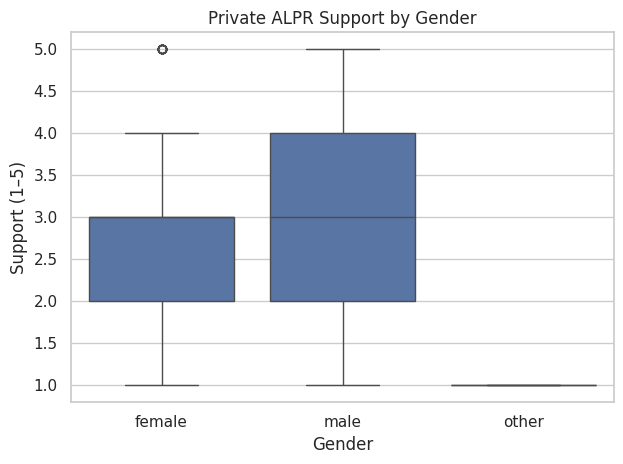

In [ ]:
sns.boxplot(x='gender', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='gender', y='support_private_num', data=df)
plt.title("Private ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


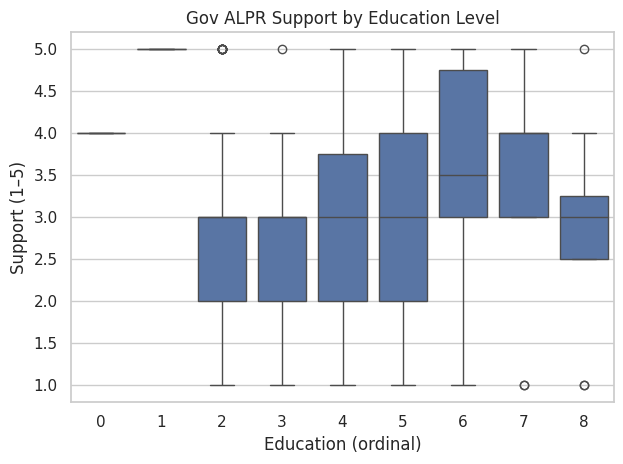

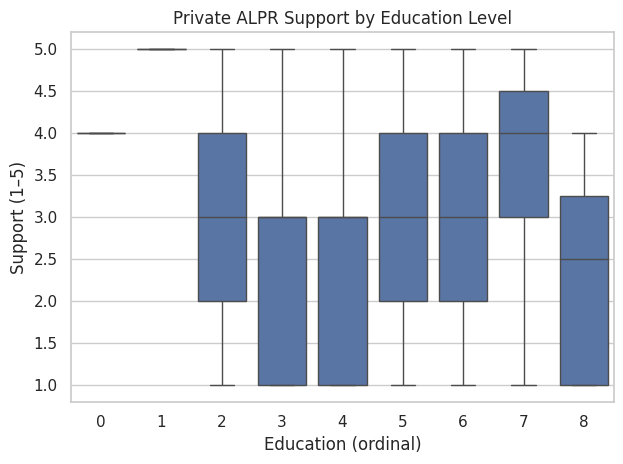

In [ ]:
sns.boxplot(x='education_ord', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Education Level")
plt.xlabel("Education (ordinal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='education_ord', y='support_private_num', data=df)
plt.title("Private ALPR Support by Education Level")
plt.xlabel("Education (ordinal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


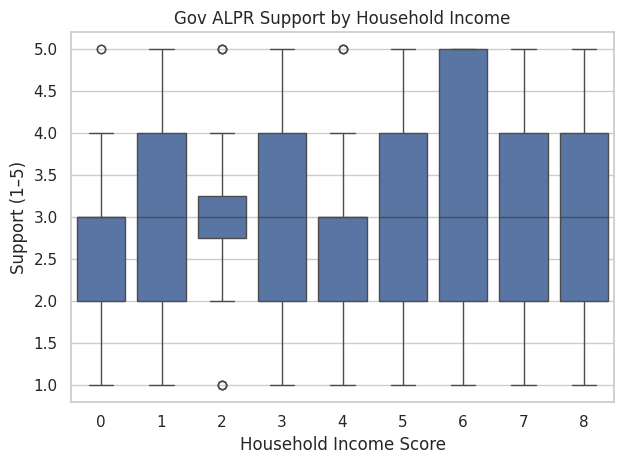

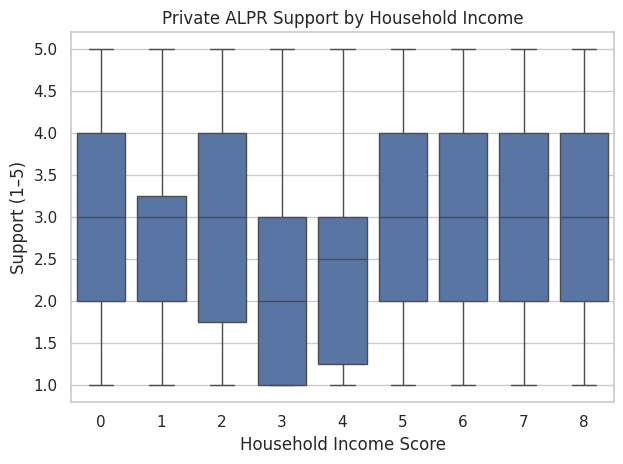

In [ ]:
sns.boxplot(x='householdIncomeScore', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Household Income")
plt.xlabel("Household Income Score")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.boxplot(x='householdIncomeScore', y='support_private_num', data=df)
plt.title("Private ALPR Support by Household Income")
plt.xlabel("Household Income Score")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


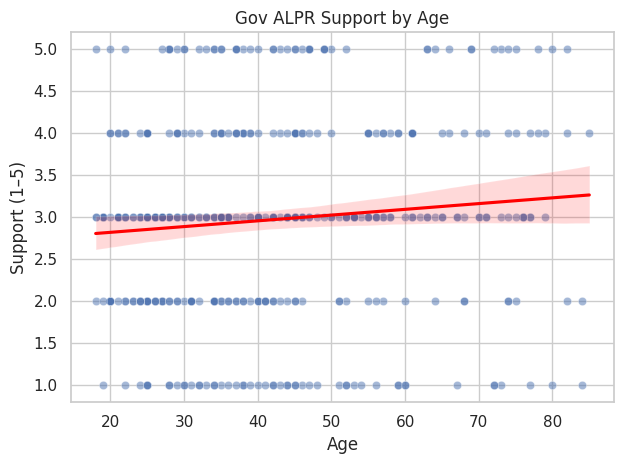

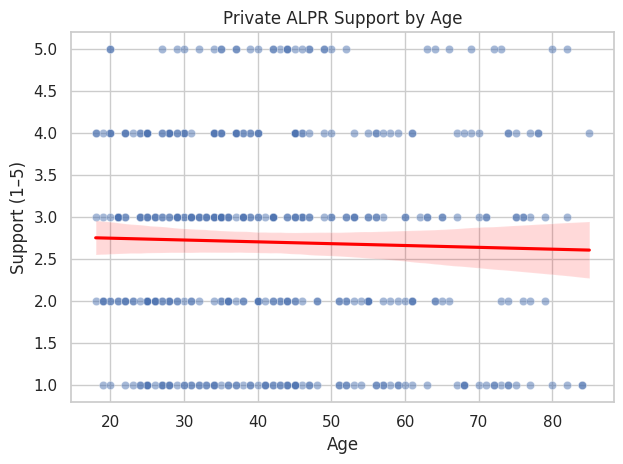

In [ ]:
sns.scatterplot(x='age', y='support_gov_num', data=df, alpha=0.5)
sns.regplot(x='age', y='support_gov_num', data=df, scatter=False, color='red')
plt.title("Gov ALPR Support by Age")
plt.xlabel("Age")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

sns.scatterplot(x='age', y='support_private_num', data=df, alpha=0.5)
sns.regplot(x='age', y='support_private_num', data=df, scatter=False, color='red')
plt.title("Private ALPR Support by Age")
plt.xlabel("Age")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


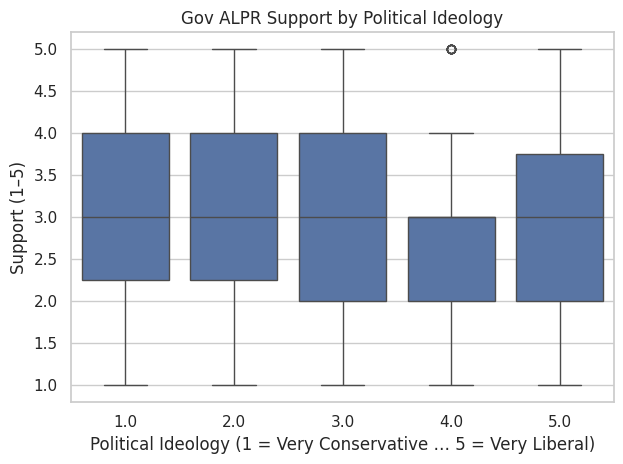

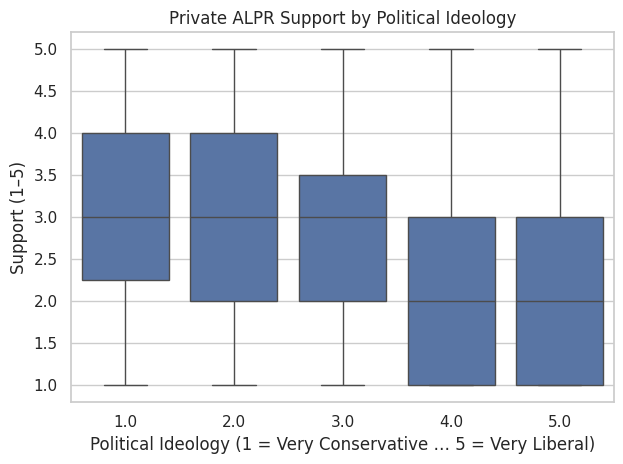

In [ ]:
# Gov ALPR support by political ideology
sns.boxplot(x='political_ord', y='support_gov_num', data=df)
plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

# Private ALPR support by political ideology
sns.boxplot(x='political_ord', y='support_private_num', data=df)
plt.title("Private ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


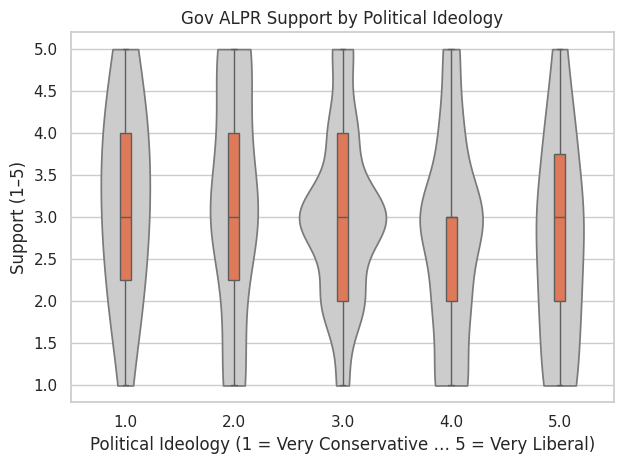

In [ ]:
sns.violinplot(x='political_ord', y='support_gov_num', data=df, inner=None, color=".8", cut =0)
sns.boxplot(x='political_ord', y='support_gov_num', data=df, whis=[0, 100], width=0.1, color="#f46d43")

plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()



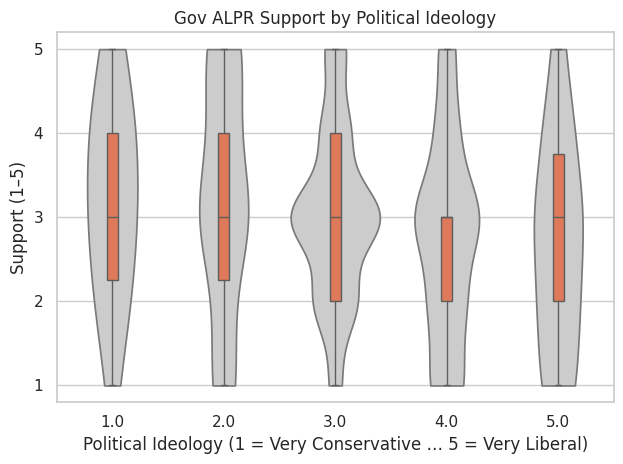

In [ ]:
from matplotlib.ticker import MaxNLocator

sns.violinplot(
    x='political_ord', y='support_gov_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='political_ord', y='support_gov_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Gov ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")

# force y-axis ticks to be integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


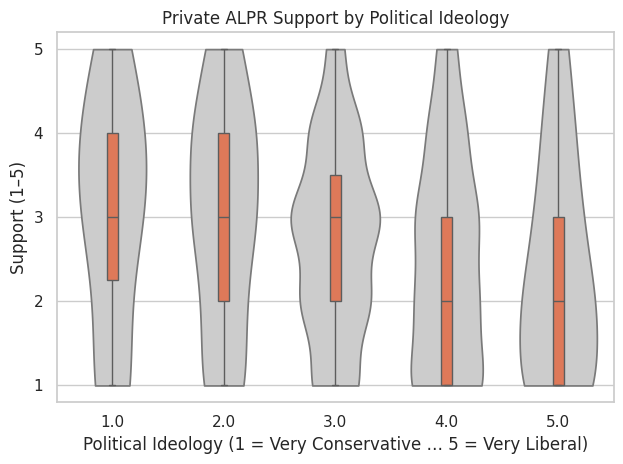

In [ ]:
sns.violinplot(
    x='political_ord', y='support_private_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='political_ord', y='support_private_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Private ALPR Support by Political Ideology")
plt.xlabel("Political Ideology (1 = Very Conservative … 5 = Very Liberal)")
plt.ylabel("Support (1–5)")

#force y-axis ticks to be integers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


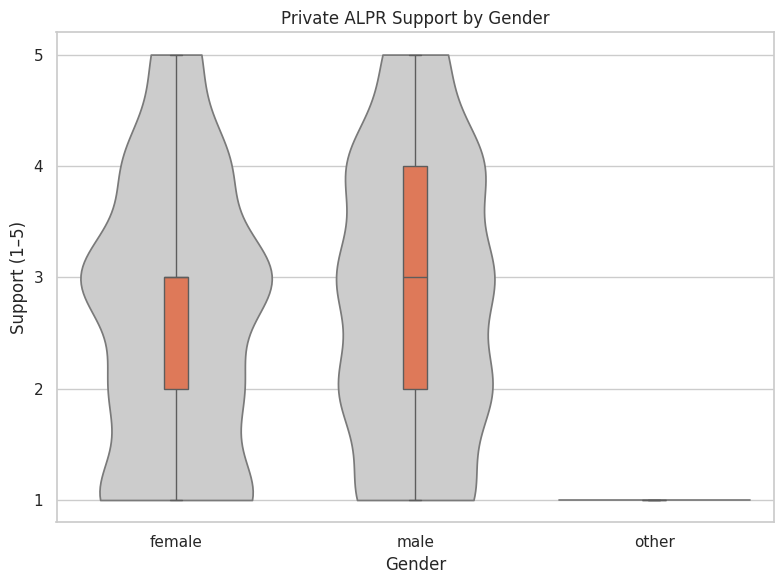

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 6))

sns.violinplot(
    x='gender',
    y='support_private_num',
    data=df,
    inner=None,
    color=".8",
    cut=0
)

sns.boxplot(
    x='gender',
    y='support_private_num',
    data=df,
    whis=[0, 100],
    width=0.1,
    color="#f46d43"
)

plt.title("Private ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


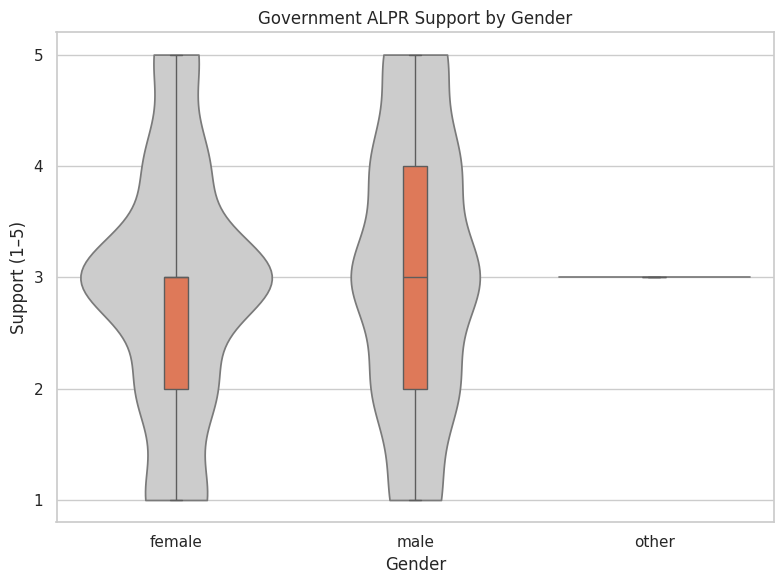

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    x='gender',
    y='support_gov_num',
    data=df,
    inner=None,
    color=".8",
    cut=0
)

sns.boxplot(
    x='gender',
    y='support_gov_num',
    data=df,
    whis=[0, 100],
    width=0.1,
    color="#f46d43"
)

plt.title("Government ALPR Support by Gender")
plt.xlabel("Gender")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


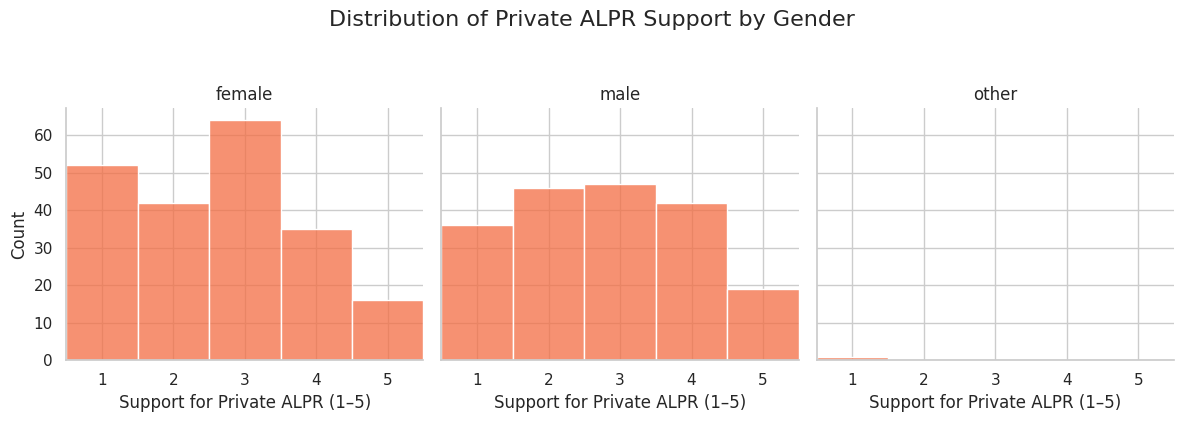

In [ ]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col='gender', col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, 'support_private_num', bins=5, discrete=True, color="#f46d43")

g.set_titles("{col_name}")
g.set_axis_labels("Support for Private ALPR (1–5)", "Count")
g.set(xlim=(0.5, 5.5), xticks=[1, 2, 3, 4, 5])

plt.suptitle("Distribution of Private ALPR Support by Gender", y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


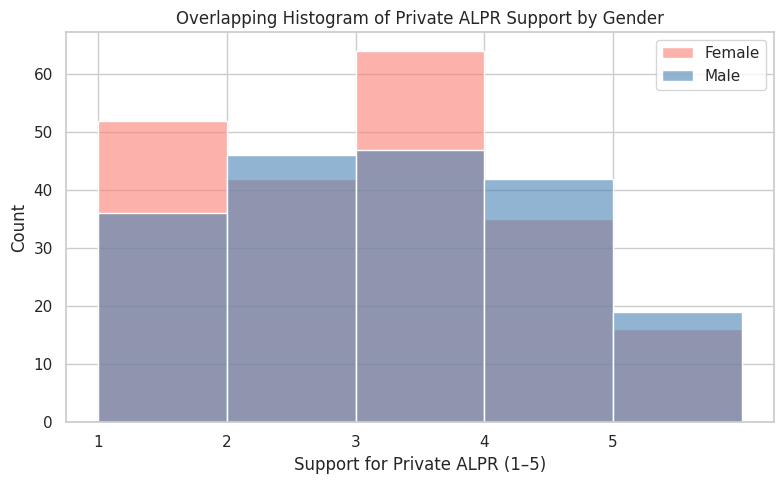

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df[df['gender'] == 'female'], x='support_private_num',
             bins=[1, 2, 3, 4, 5, 6], color='salmon', label='Female', alpha=0.6)

sns.histplot(data=df[df['gender'] == 'male'], x='support_private_num',
             bins=[1, 2, 3, 4, 5, 6], color='steelblue', label='Male', alpha=0.6)

plt.title("Overlapping Histogram of Private ALPR Support by Gender")
plt.xlabel("Support for Private ALPR (1–5)")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.tight_layout()
plt.show()


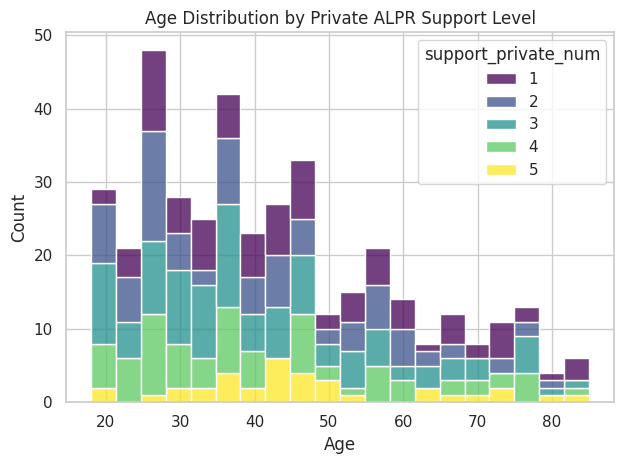

In [ ]:
# Hm... how useful is this

sns.histplot(
    data=df,
    x="age", hue="support_private_num", multiple="stack", bins=20,
    palette="viridis"
)
plt.title("Age Distribution by Private ALPR Support Level")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


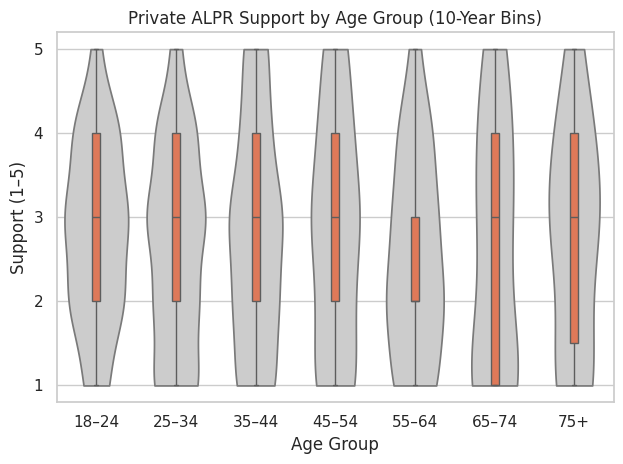

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 90]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']

df['age_bucket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
sns.violinplot(
    x='age_bucket', y='support_private_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='age_bucket', y='support_private_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Private ALPR Support by Age Group (10-Year Bins)")
plt.xlabel("Age Group")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

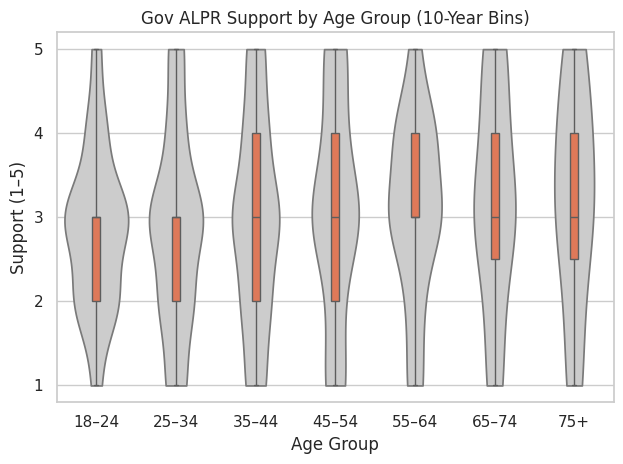

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 90]
age_labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–74', '75+']

df['age_bucket'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
sns.violinplot(
    x='age_bucket', y='support_gov_num',
    data=df, inner=None, color=".8", cut=0
)
sns.boxplot(
    x='age_bucket', y='support_gov_num',
    data=df, whis=[0, 100], width=0.1, color="#f46d43"
)

plt.title("Gov ALPR Support by Age Group (10-Year Bins)")
plt.xlabel("Age Group")
plt.ylabel("Support (1–5)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

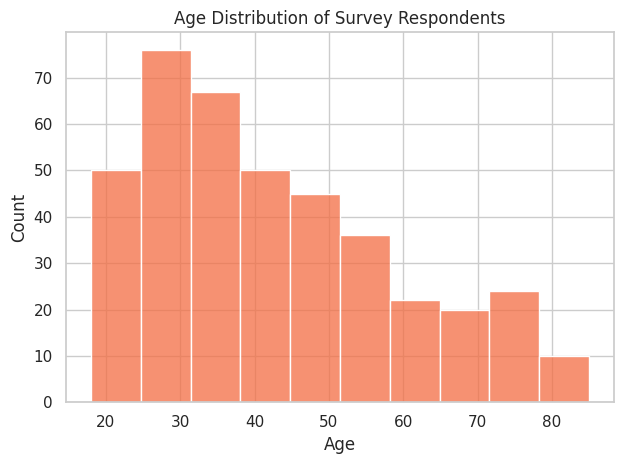

In [ ]:
sns.histplot(df['age'], bins=10, kde=False, color='#f46d43')
plt.title("Age Distribution of Survey Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
income_order = [
    'Less than $9,999',
    '$10,000 to $24,999',
    '$25,000 to $39,999',
    '$40,000 to $59,999',
    '$60,000 to $84,999',
    '$85,000 to $114,999',
    '$115,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

df['householdIncome'] = pd.Categorical(df['householdIncome'], categories=income_order, ordered=True)


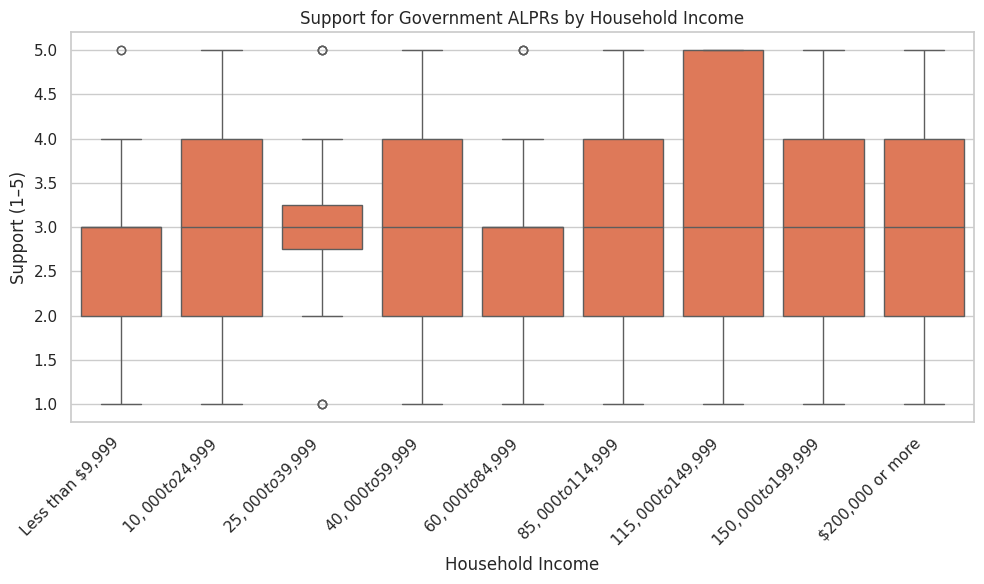

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='householdIncome', y='support_gov_num',
    data=df, order=income_order, color="#f46d43"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Household Income")
plt.ylabel("Support (1–5)")
plt.title("Support for Government ALPRs by Household Income")
plt.tight_layout()
plt.show()


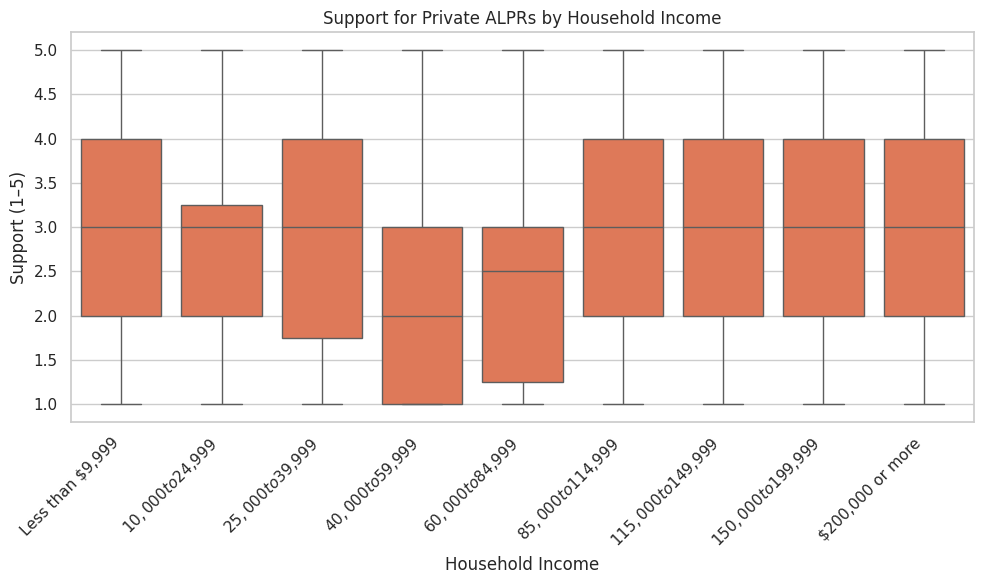

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='householdIncome', y='support_private_num',
    data=df, order=income_order, color="#f46d43"
)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Household Income")
plt.ylabel("Support (1–5)")
plt.title("Support for Private ALPRs by Household Income")
plt.tight_layout()
plt.show()


householdIncome
Less than $9,999        41
$10,000 to $24,999      24
$25,000 to $39,999      24
$40,000 to $59,999      52
$60,000 to $84,999      70
$85,000 to $114,999     64
$115,000 to $149,999    38
$150,000 to $199,999    48
$200,000 or more        39
Name: count, dtype: int64


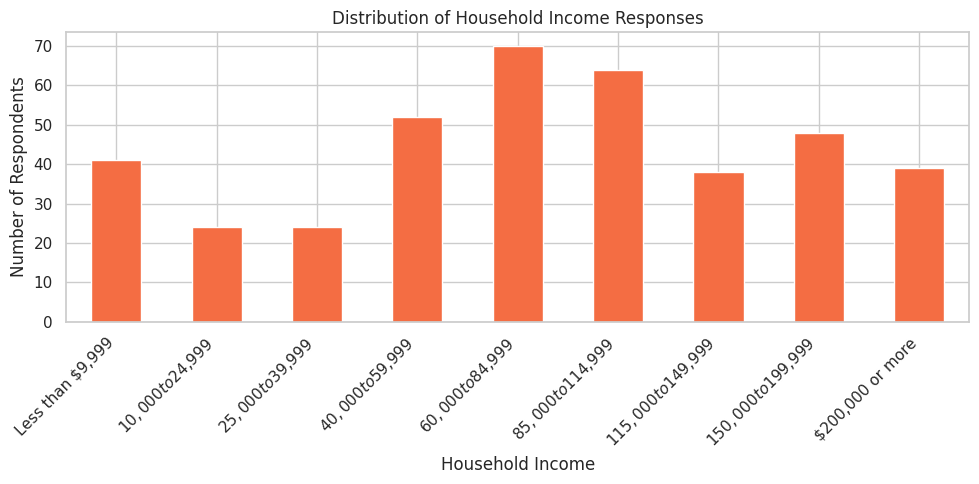

In [ ]:
# Count of respondents in each household income bracket
income_counts = df['householdIncome'].value_counts().sort_index()

print(income_counts)

plt.figure(figsize=(10, 5))
income_counts.plot(kind='bar', color='#f46d43')
plt.title('Distribution of Household Income Responses')
plt.xlabel('Household Income')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


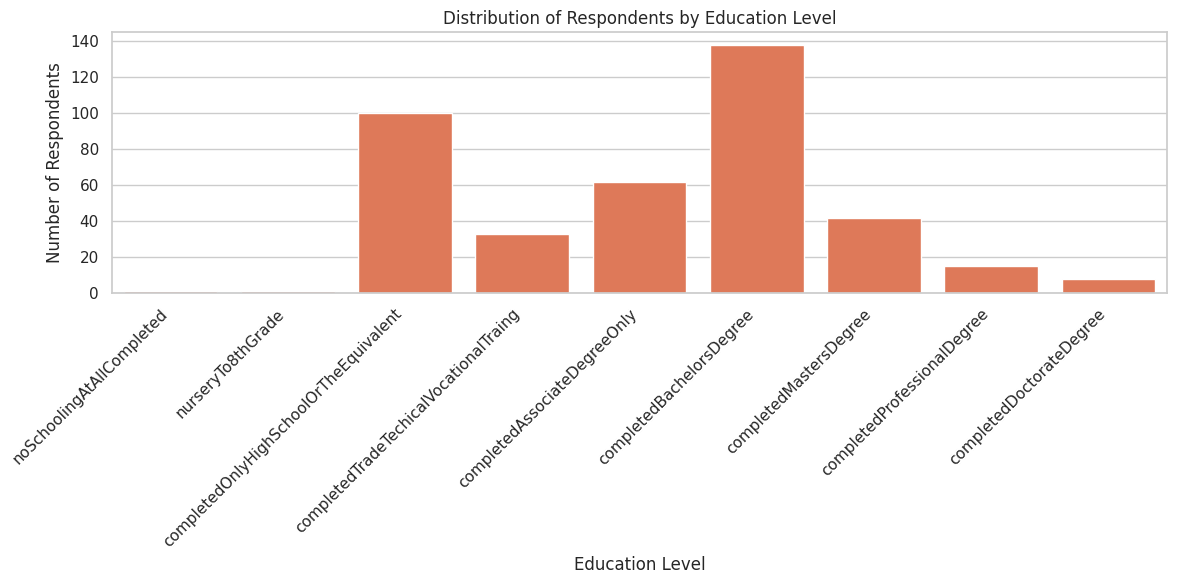

In [ ]:
# Define ordered categories for readability
education_order = [
    'noSchoolingAtAllCompleted',
    'nurseryTo8thGrade',
    'completedOnlyHighSchoolOrTheEquivalent',
    'completedTradeTechicalVocationalTraing',
    'completedAssociateDegreeOnly',
    'completedBachelorsDegree',
    'completedMastersDegree',
    'completedProfessionalDegree',
    'completedDoctorateDegree'
]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', order=education_order, color='#f46d43')

plt.title('Distribution of Respondents by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


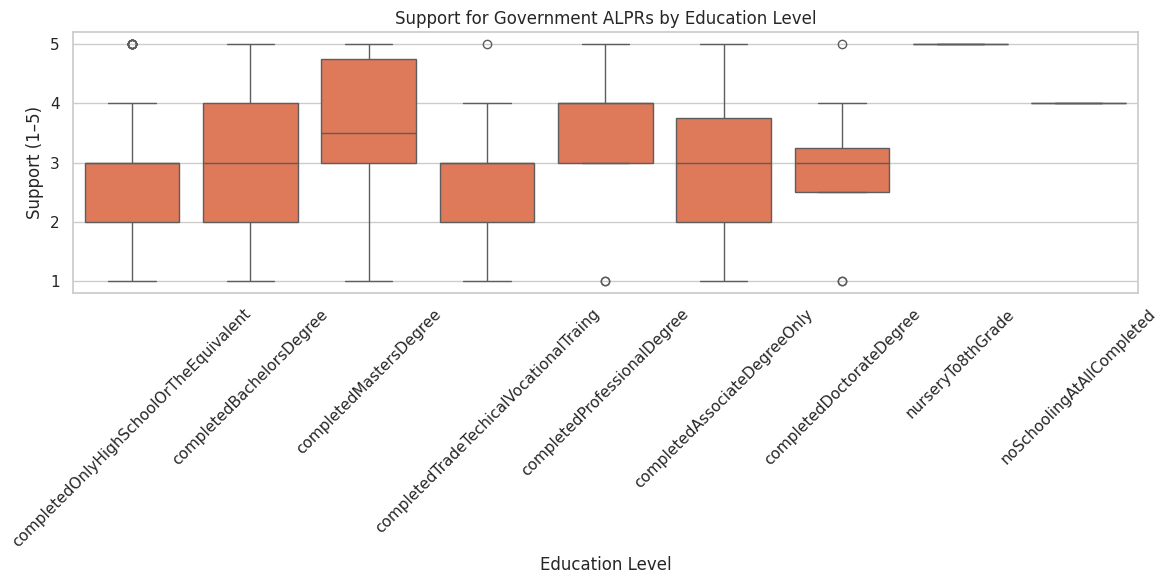

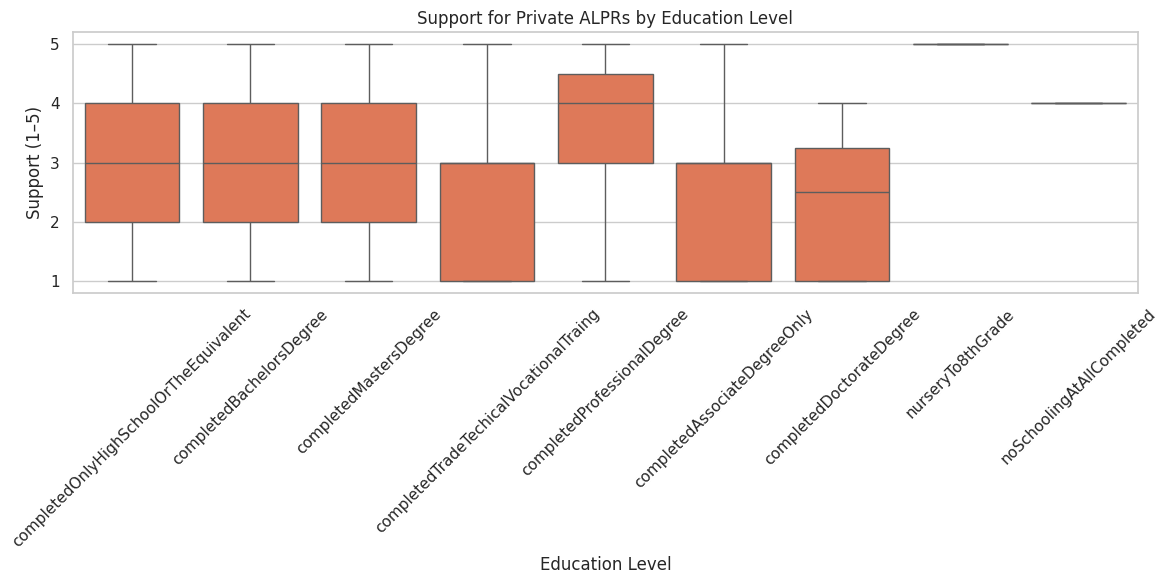

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='education',
    y='support_gov_num',
    color='#f46d43'
)
plt.title("Support for Government ALPRs by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Private ALPRs
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='education',
    y='support_private_num',
    color='#f46d43'
)
plt.title("Support for Private ALPRs by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3801410741.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=race_df_long, x="Race", y=gov_support_col, palette="Set2")


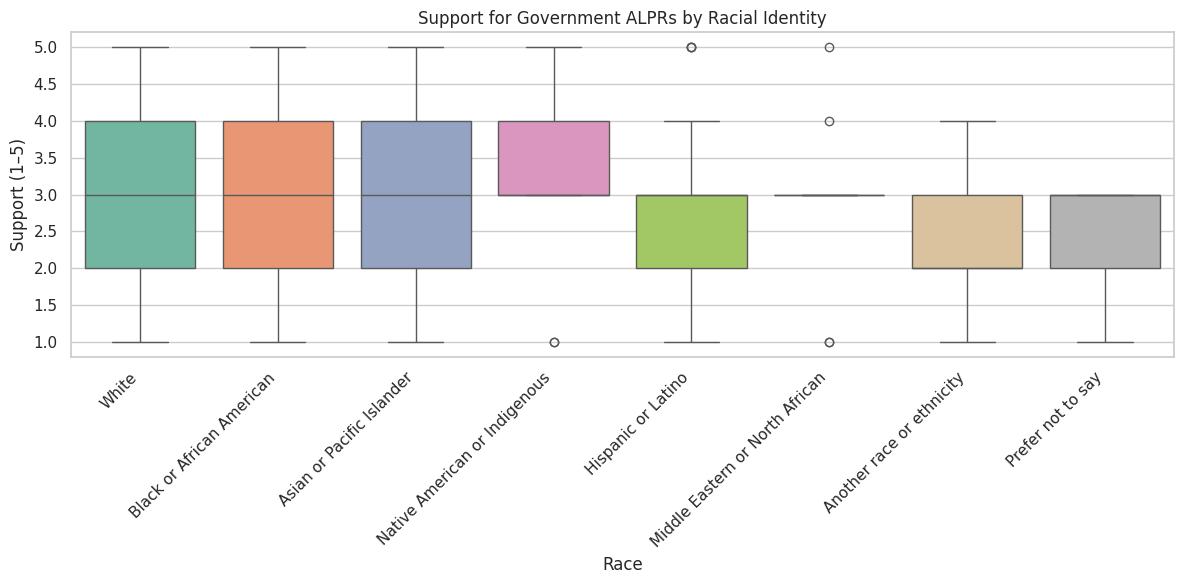

/tmp/ipython-input-3801410741.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=race_df_long, x="Race", y=priv_support_col, palette="Set2")


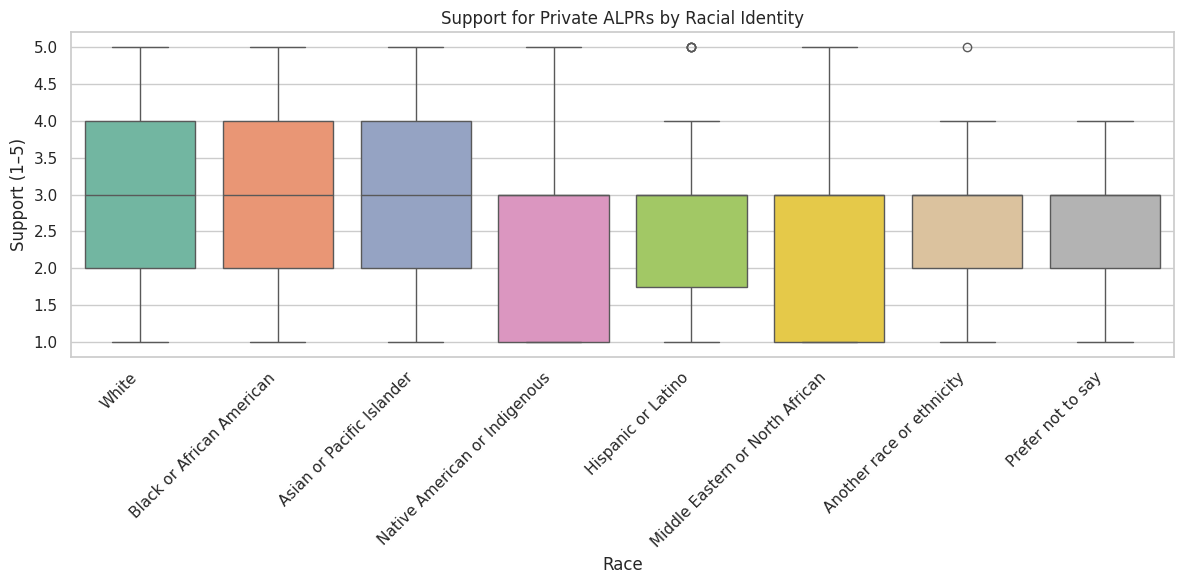

In [ ]:
race_col = "What is your race or ethnicity? (Select all that apply) (d8morv7)"
gov_support_col = "support_gov_num"   # Replace with actual column name
priv_support_col = "support_private_num" # Replace with actual column name

race_keywords = [
    "White", "Black or African American", "Asian or Pacific Islander",
    "Native American or Indigenous", "Hispanic or Latino",
    "Middle Eastern or North African", "Another race or ethnicity", "Prefer not to say"
]

for race in race_keywords:
    df[race] = df[race_col].str.contains(race, na=False)

race_df_long = df.melt(
    id_vars=[gov_support_col, priv_support_col],
    value_vars=race_keywords,
    var_name="Race",
    value_name="Selected"
)

race_df_long = race_df_long[race_df_long["Selected"] == True]

# Government ALPR Support
plt.figure(figsize=(12, 6))
sns.boxplot(data=race_df_long, x="Race", y=gov_support_col, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Support for Government ALPRs by Racial Identity")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()

# Private ALPR Support
plt.figure(figsize=(12, 6))
sns.boxplot(data=race_df_long, x="Race", y=priv_support_col, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.title("Support for Private ALPRs by Racial Identity")
plt.ylabel("Support (1–5)")
plt.tight_layout()
plt.show()


In [ ]:
race_col = "What is your race or ethnicity? (Select all that apply) (d8morv7)"

def categorize_race(value):
    if pd.isna(value):
        return 'Missing'
    races = value.split(",")
    if len(races) > 1:
        return "Multiracial"
    else:
        return races[0]

df['Race'] = df[race_col].apply(categorize_race)

df['Race'] = df['Race'].replace({
    'Prefer not to say': 'Prefer not to say',
    'Another race or ethnicity': 'Other',
    'Missing': 'Missing'
})

print("New Race categories:", df['Race'].value_counts())


New Race categories: Race
Asian or Pacific Islander          115
White                               93
Black or African American           57
Hispanic or Latino                  44
Multiracial                         44
Prefer not to say                   18
Other                               11
Missing                              7
Middle Eastern or North African      6
Native American or Indigenous        5
Name: count, dtype: int64


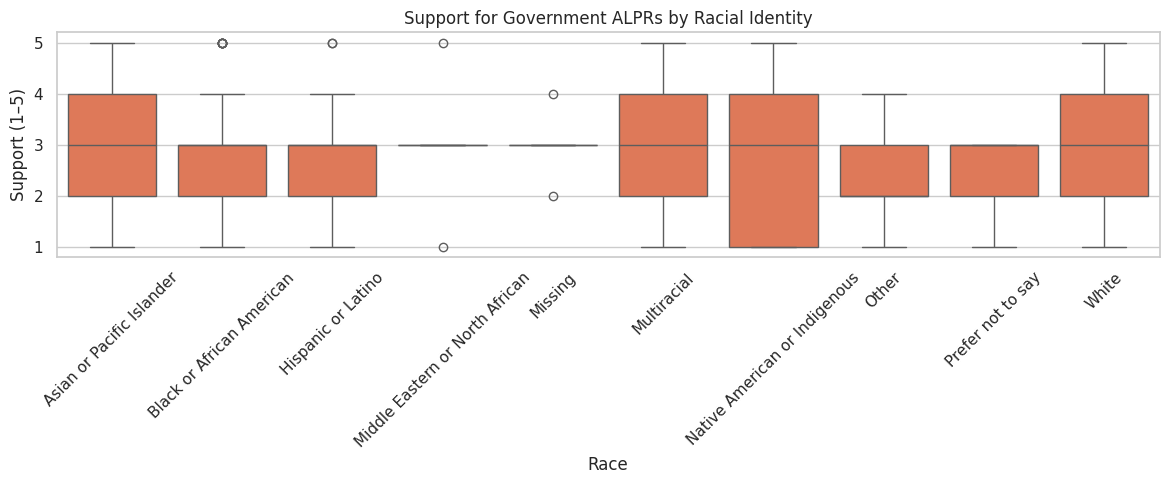

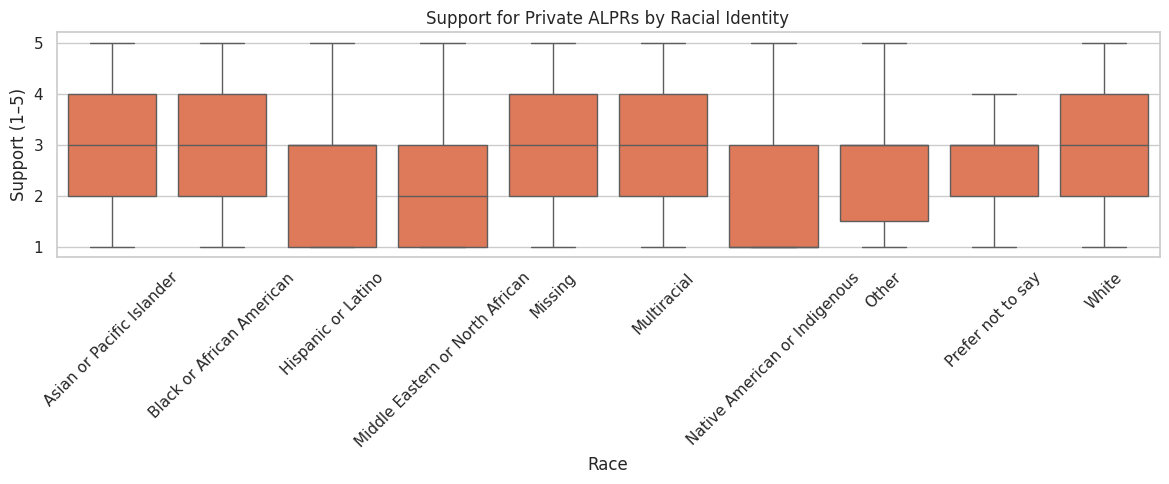

In [ ]:
# Government ALPR support boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x='Race', y='support_gov_num', color="#f46d43", data=df, order=sorted(df['Race'].unique()))
plt.title("Support for Government ALPRs by Racial Identity")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Private ALPR support boxplot
plt.figure(figsize=(12, 5))
sns.boxplot(x='Race', y='support_private_num', color="#f46d43", data=df, order=sorted(df['Race'].unique()))
plt.title("Support for Private ALPRs by Racial Identity")
plt.xlabel("Race")
plt.ylabel("Support (1–5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


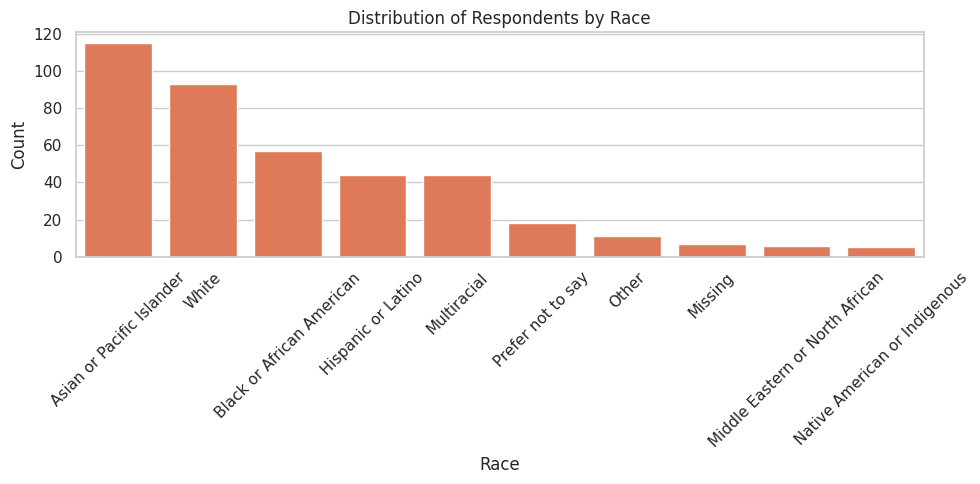

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Race', order=df['Race'].value_counts().index, color="#f46d43")

plt.title("Distribution of Respondents by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
